# JMAS Corner Plots - Sections

Here we present the sections of the corner plots for the joint modelling of astrophysical systematics (JMAS) scenario.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from processing import fisher_processing as fp
from processing import gaussians_processing as gp
from processing import helpers as h
from getdist.gaussian_mixtures import GaussianND


In [2]:
corner_path = "jmas_data/corner_plot_data/"
parameters = np.load(f"{corner_path}corner_plot_parameters.npy",
                     allow_pickle=True).item()
fisher_matrices = fp.fisher_matrices
inverse_fisher_matrices = fp.inverse_fisher_matrices
#inverse_fisher_matrices_clipped = fp.inverse_fisher_matrices_clipped
#gaussians_clipped = gp.gaussians_clipped
corner_colors = h.corner_colors
plots_path = f"plots_output/corner_plots/"

gdplot = h.gdplot
cosmoiaplot = h.cosmoiaplot
cosmoplot = h.cosmoplot
dpi = h.dpi


In [4]:
# Access inverse Fisher matrices for years 1 and 10
inv_fm_y1 = inverse_fisher_matrices["jmas"]["cosmoialf"]["1"]
inv_fm_y10 = inverse_fisher_matrices["jmas"]["cosmoialf"]["10"]

# Indices for each component
cosmo_indices = np.r_[0:7]   # First 7
ia_indices = np.r_[7:11]     # Next 4
lf_indices = np.r_[11:16]    # Last 5

# Year 1 submatrices
cosmo_lf_matrix_y1 = np.delete(np.delete(inv_fm_y1, ia_indices, axis=0), ia_indices, axis=1)  # Delete ia
ia_lf_matrix_y1 = np.delete(np.delete(inv_fm_y1, cosmo_indices, axis=0), cosmo_indices, axis=1)  # Delete cosmo
lf_matrix_y1 = np.delete(np.delete(inv_fm_y1, np.r_[cosmo_indices, ia_indices], axis=0), np.r_[cosmo_indices, ia_indices], axis=1)  # Delete cosmo and ia

# Year 10 submatrices
cosmo_lf_matrix_y10 = np.delete(np.delete(inv_fm_y10, ia_indices, axis=0), ia_indices, axis=1)  # Delete ia
ia_lf_matrix_y10 = np.delete(np.delete(inv_fm_y10, cosmo_indices, axis=0), cosmo_indices, axis=1)  # Delete cosmo
lf_matrix_y10 = np.delete(np.delete(inv_fm_y10, np.r_[cosmo_indices, ia_indices], axis=0), np.r_[cosmo_indices, ia_indices], axis=1)  # Delete cosmo and ia

sliced_matrices = {
    "cosmolf": {
        "1": cosmo_lf_matrix_y1,
        "10": cosmo_lf_matrix_y10,
    },
    "ialf": {
        "1": ia_lf_matrix_y1,
        "10": ia_lf_matrix_y10,
    },
    "lf": {
        "1": lf_matrix_y1,
        "10": lf_matrix_y10,
    },
}

np.save("jmas_data/corner_plot_data/sliced_jmas_matrices.npy", sliced_matrices)


In [5]:
gaussians = {}

for key in ["cosmolf", "ialf", "lf"]:
    gaussians[key] = {
        "1": GaussianND(parameters["values"]["jmas"][key]["1"],
                        sliced_matrices[key]["1"],
                        labels=parameters["labels"]["jmas"][key]["1"],
                        names=parameters["names"]["jmas"][key]["1"]),
        "10": GaussianND(parameters["values"]["jmas"][key]["10"],
                         sliced_matrices[key]["10"],
                         labels=parameters["labels"]["jmas"][key]["10"],
                         names=parameters["names"]["jmas"][key]["10"])
    }

np.save("jmas_data/corner_plot_data/sliced_jmas_gaussians.npy", gaussians)

# Plotting the corner plots for each section

CPU times: user 21.1 s, sys: 2.65 s, total: 23.7 s
Wall time: 10.1 s


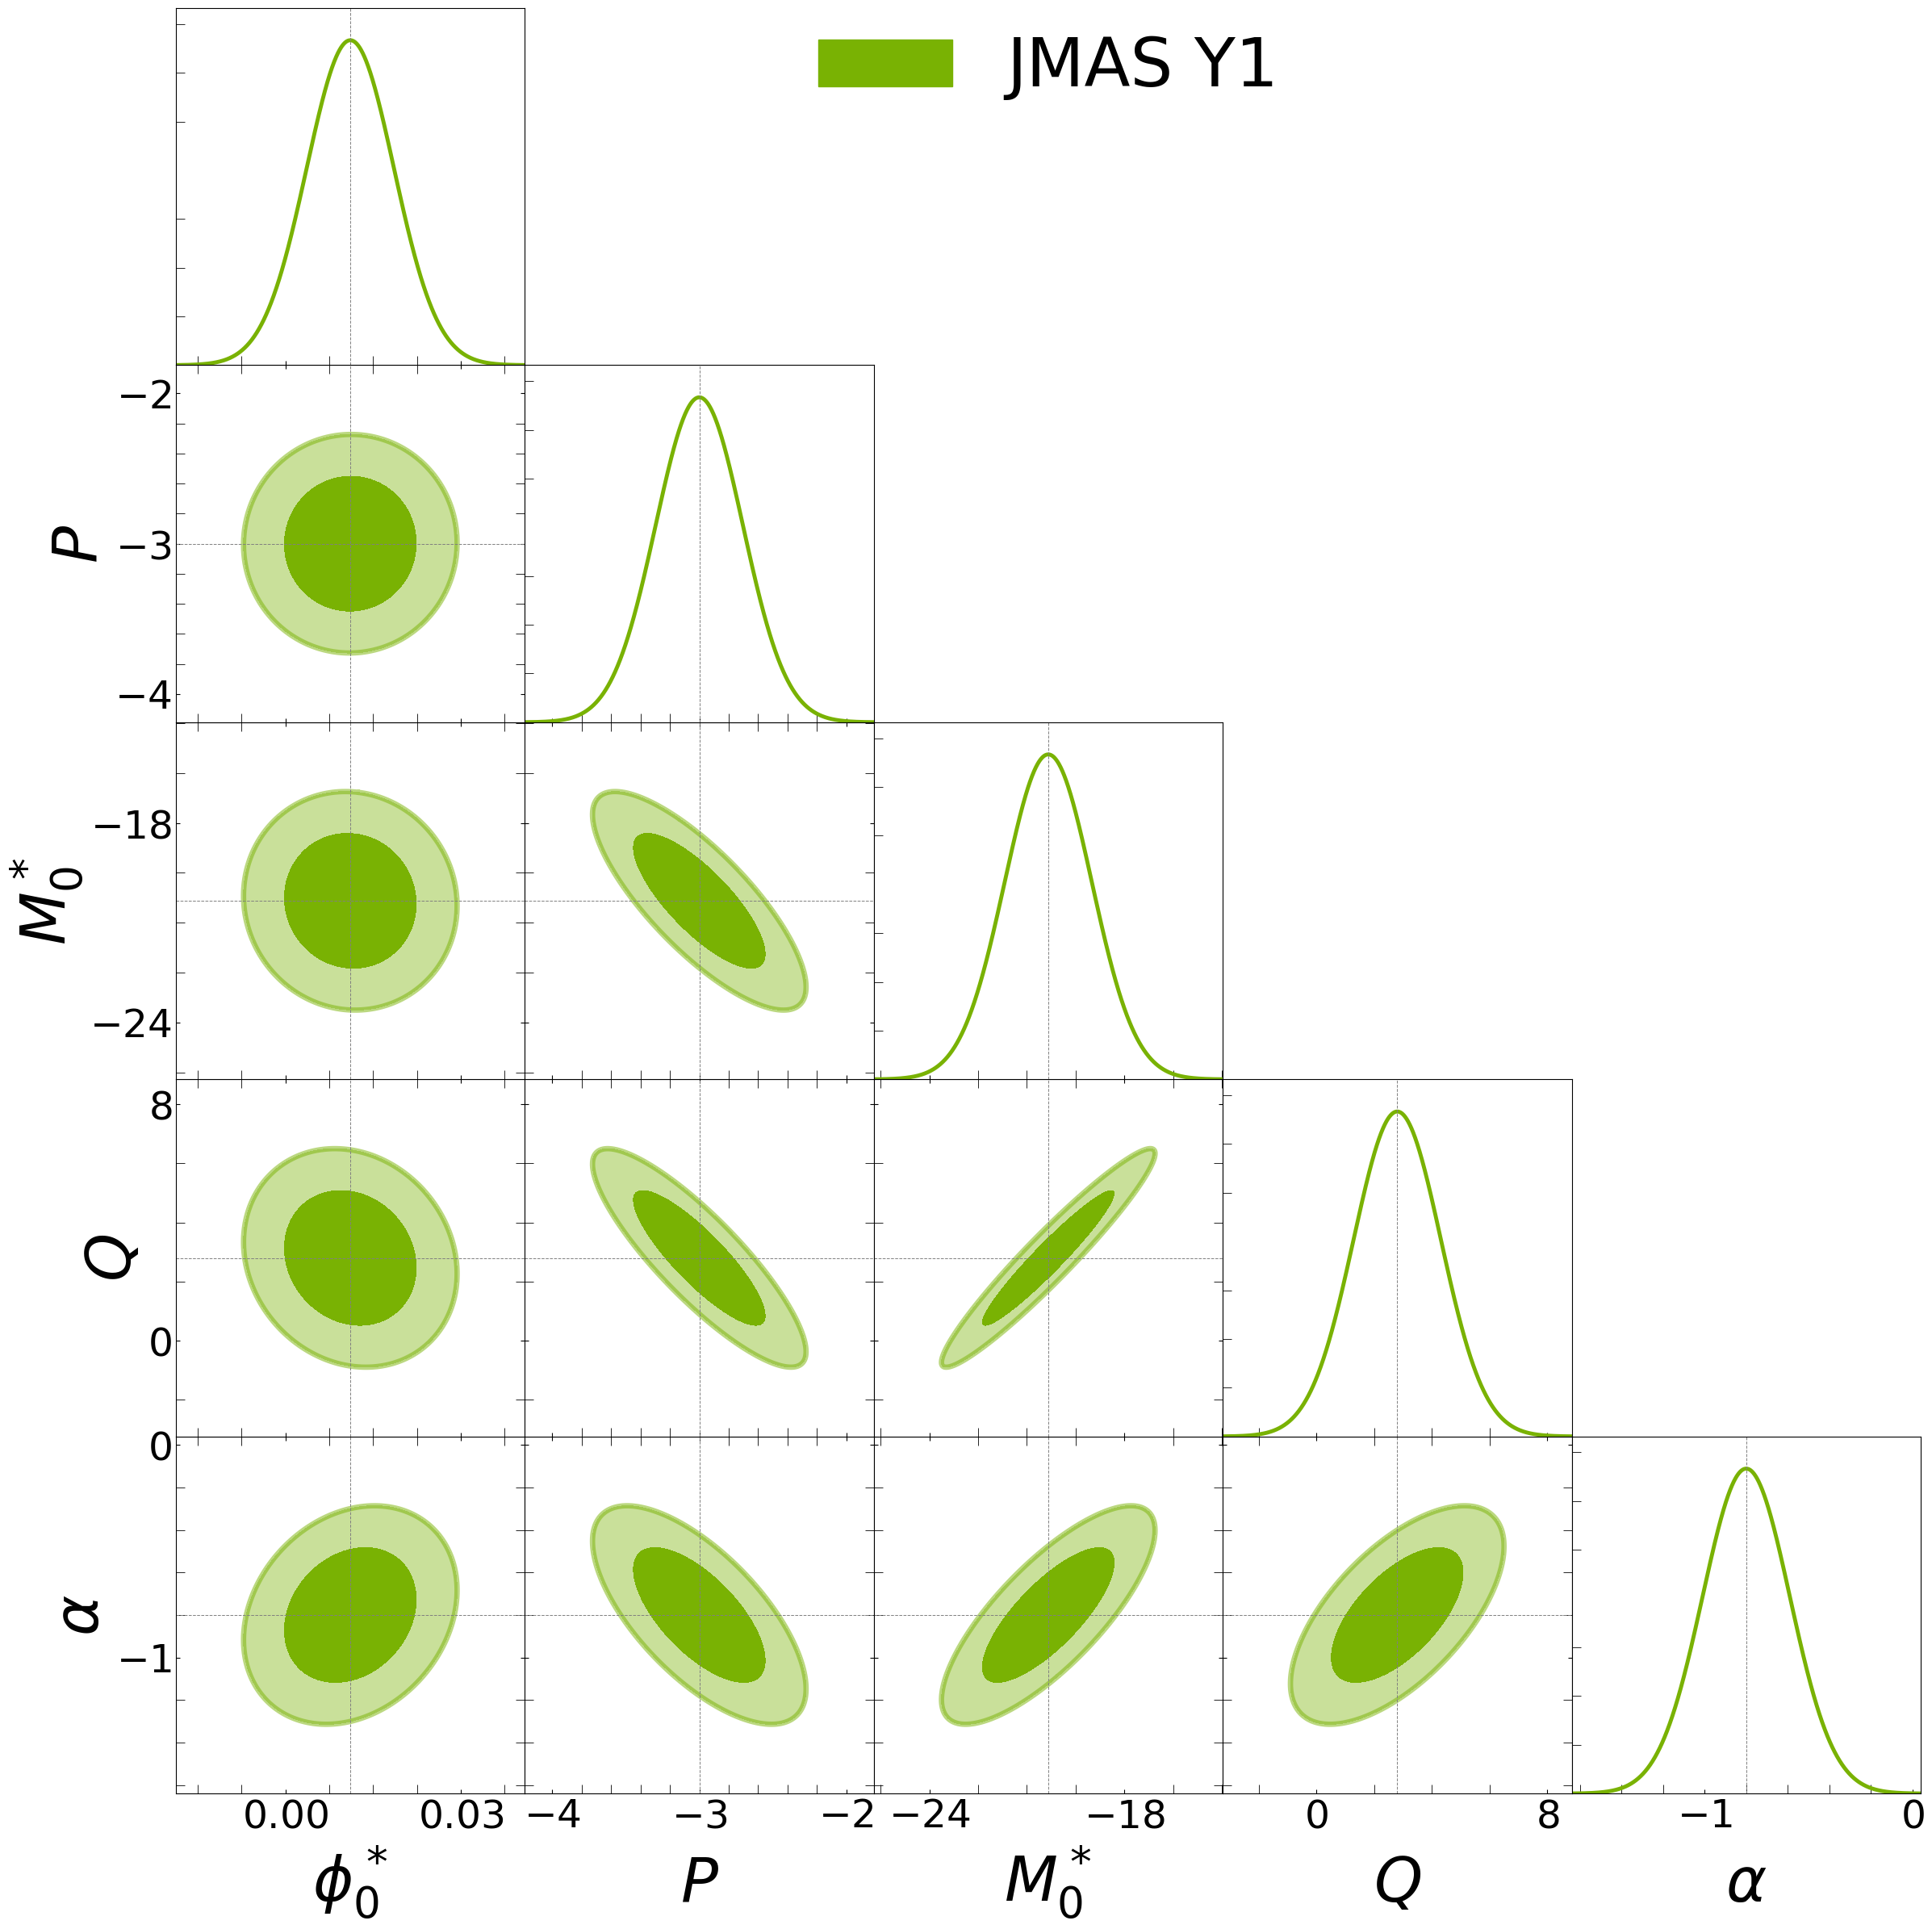

In [17]:
%%time

slice = "lf"
year = "1"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 55
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 35
gdplot.settings.legend_fontsize = 60

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")


CPU times: user 22.1 s, sys: 1.95 s, total: 24 s
Wall time: 10.6 s


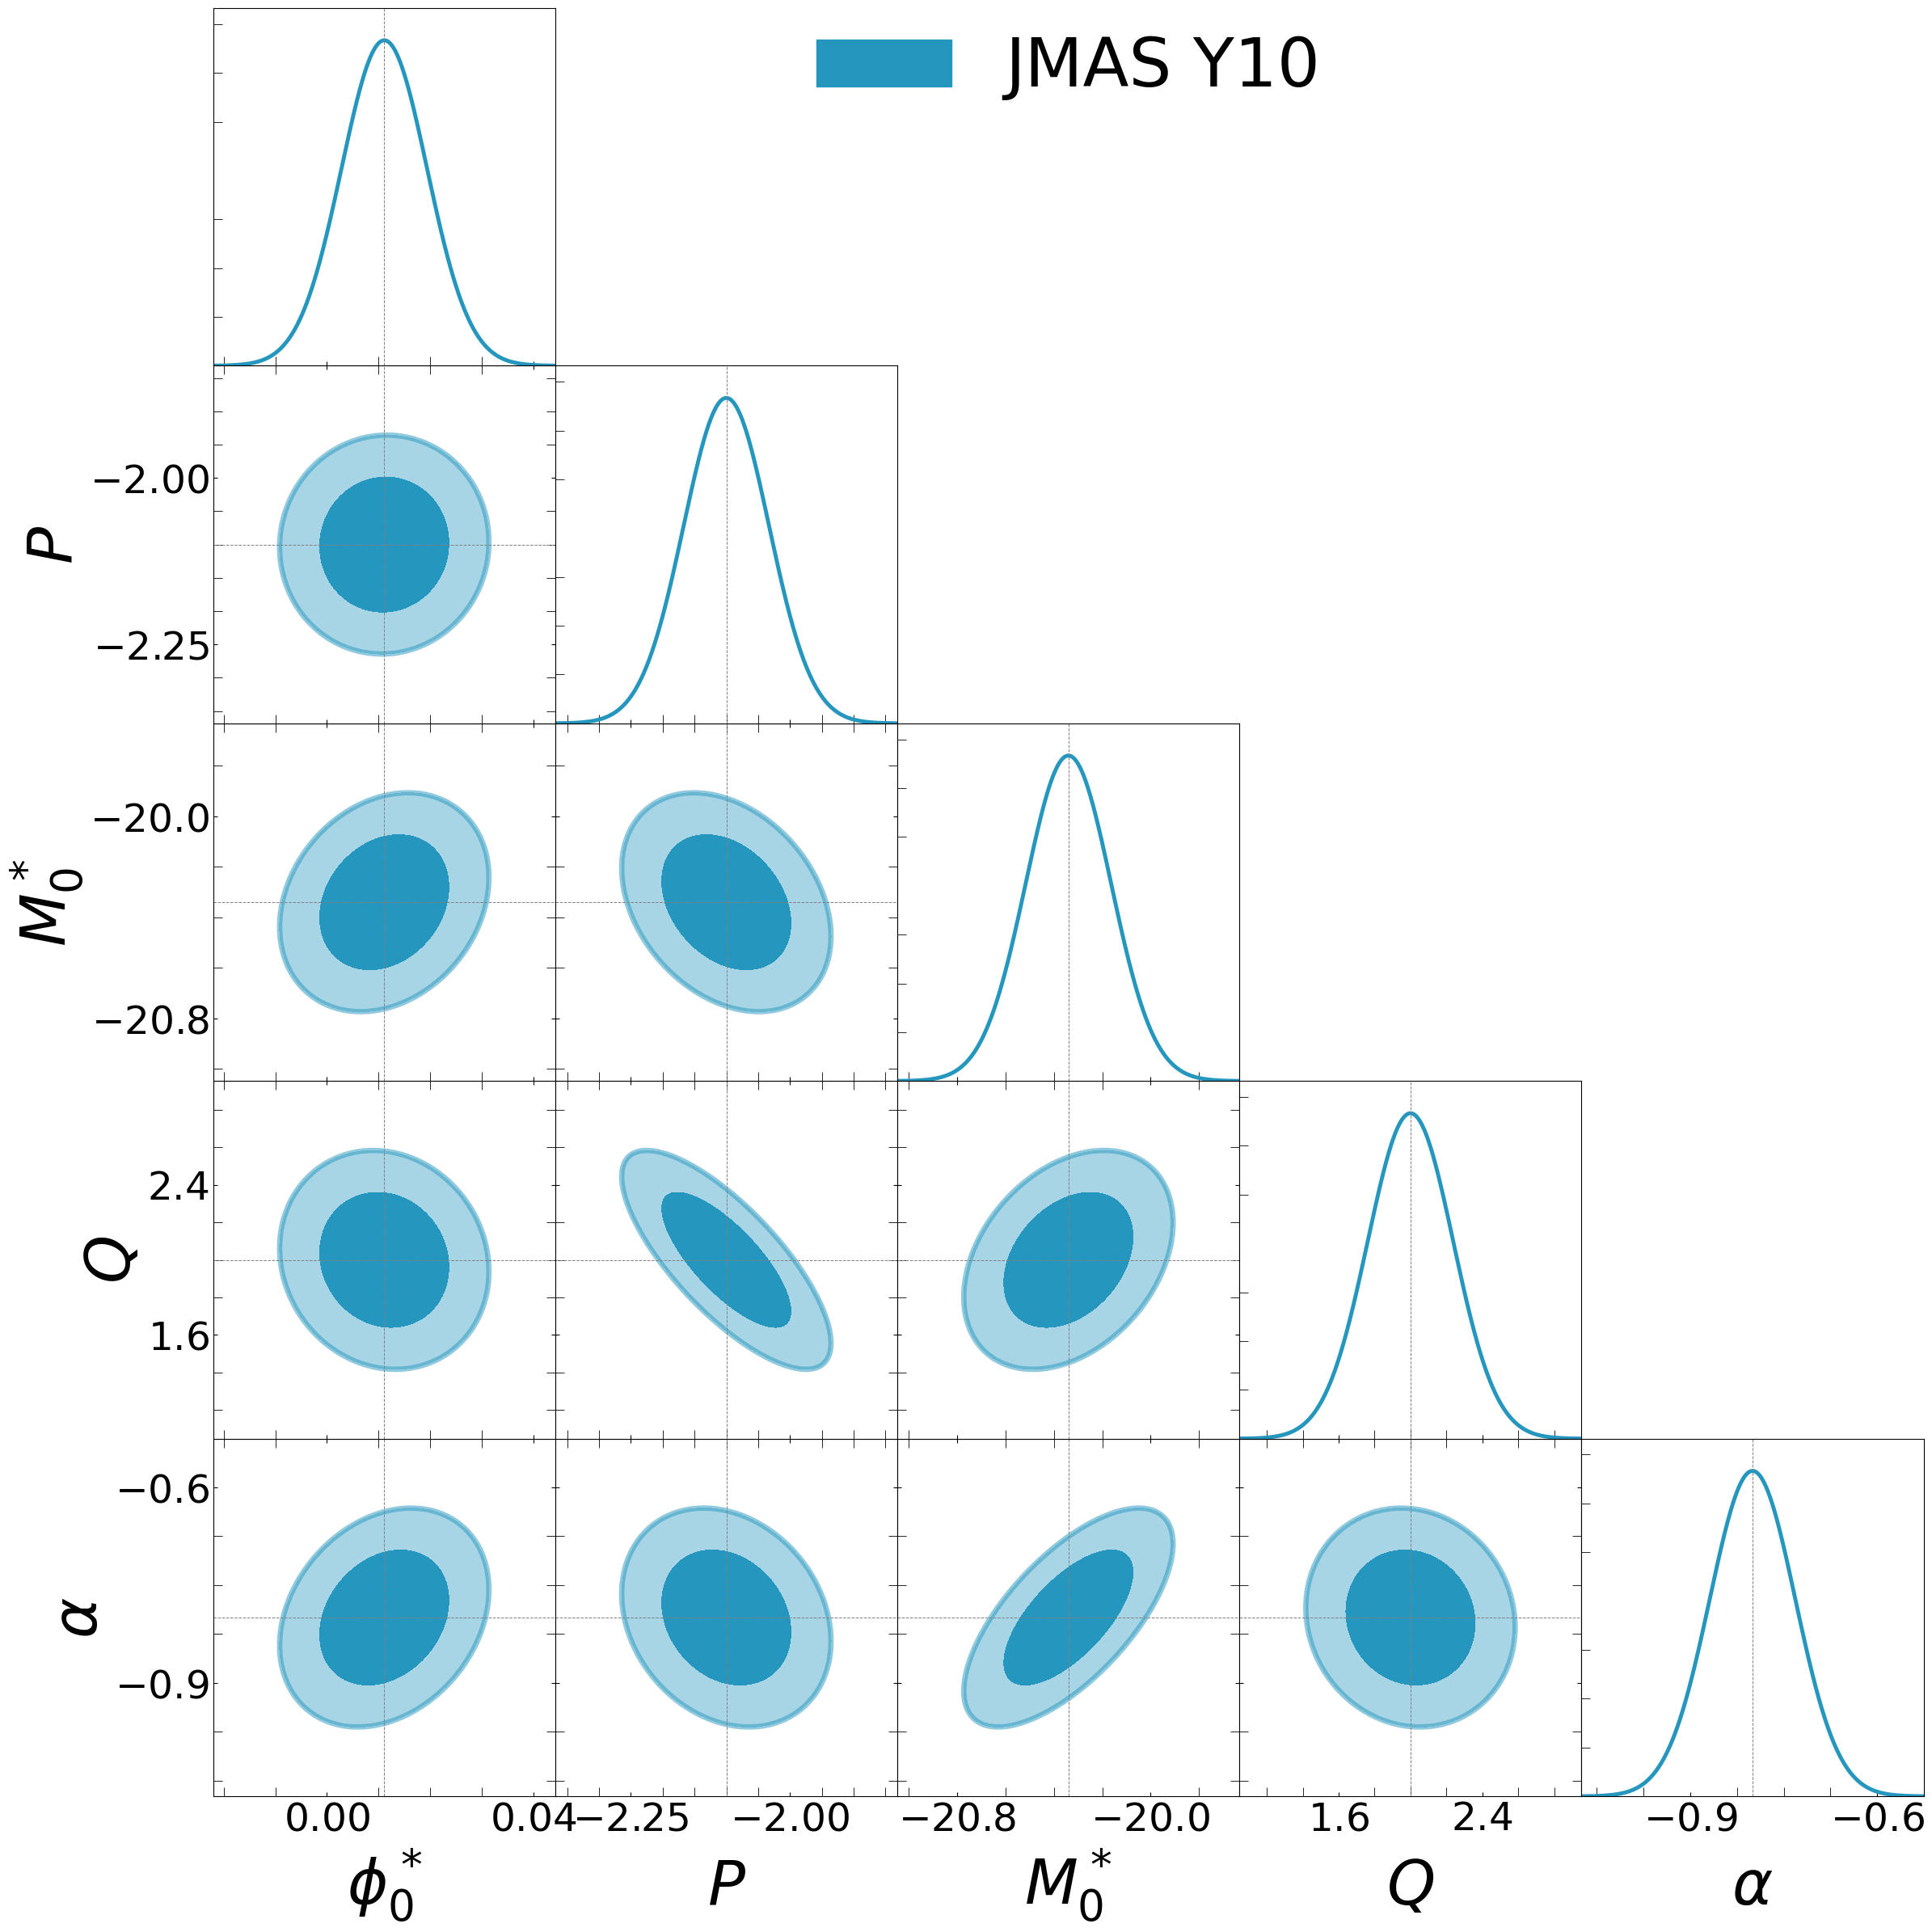

In [18]:
%%time

slice = "lf"
year = "10"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 55
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 35
gdplot.settings.legend_fontsize = 60

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")


CPU times: user 1min 54s, sys: 12.2 s, total: 2min 6s
Wall time: 53.7 s


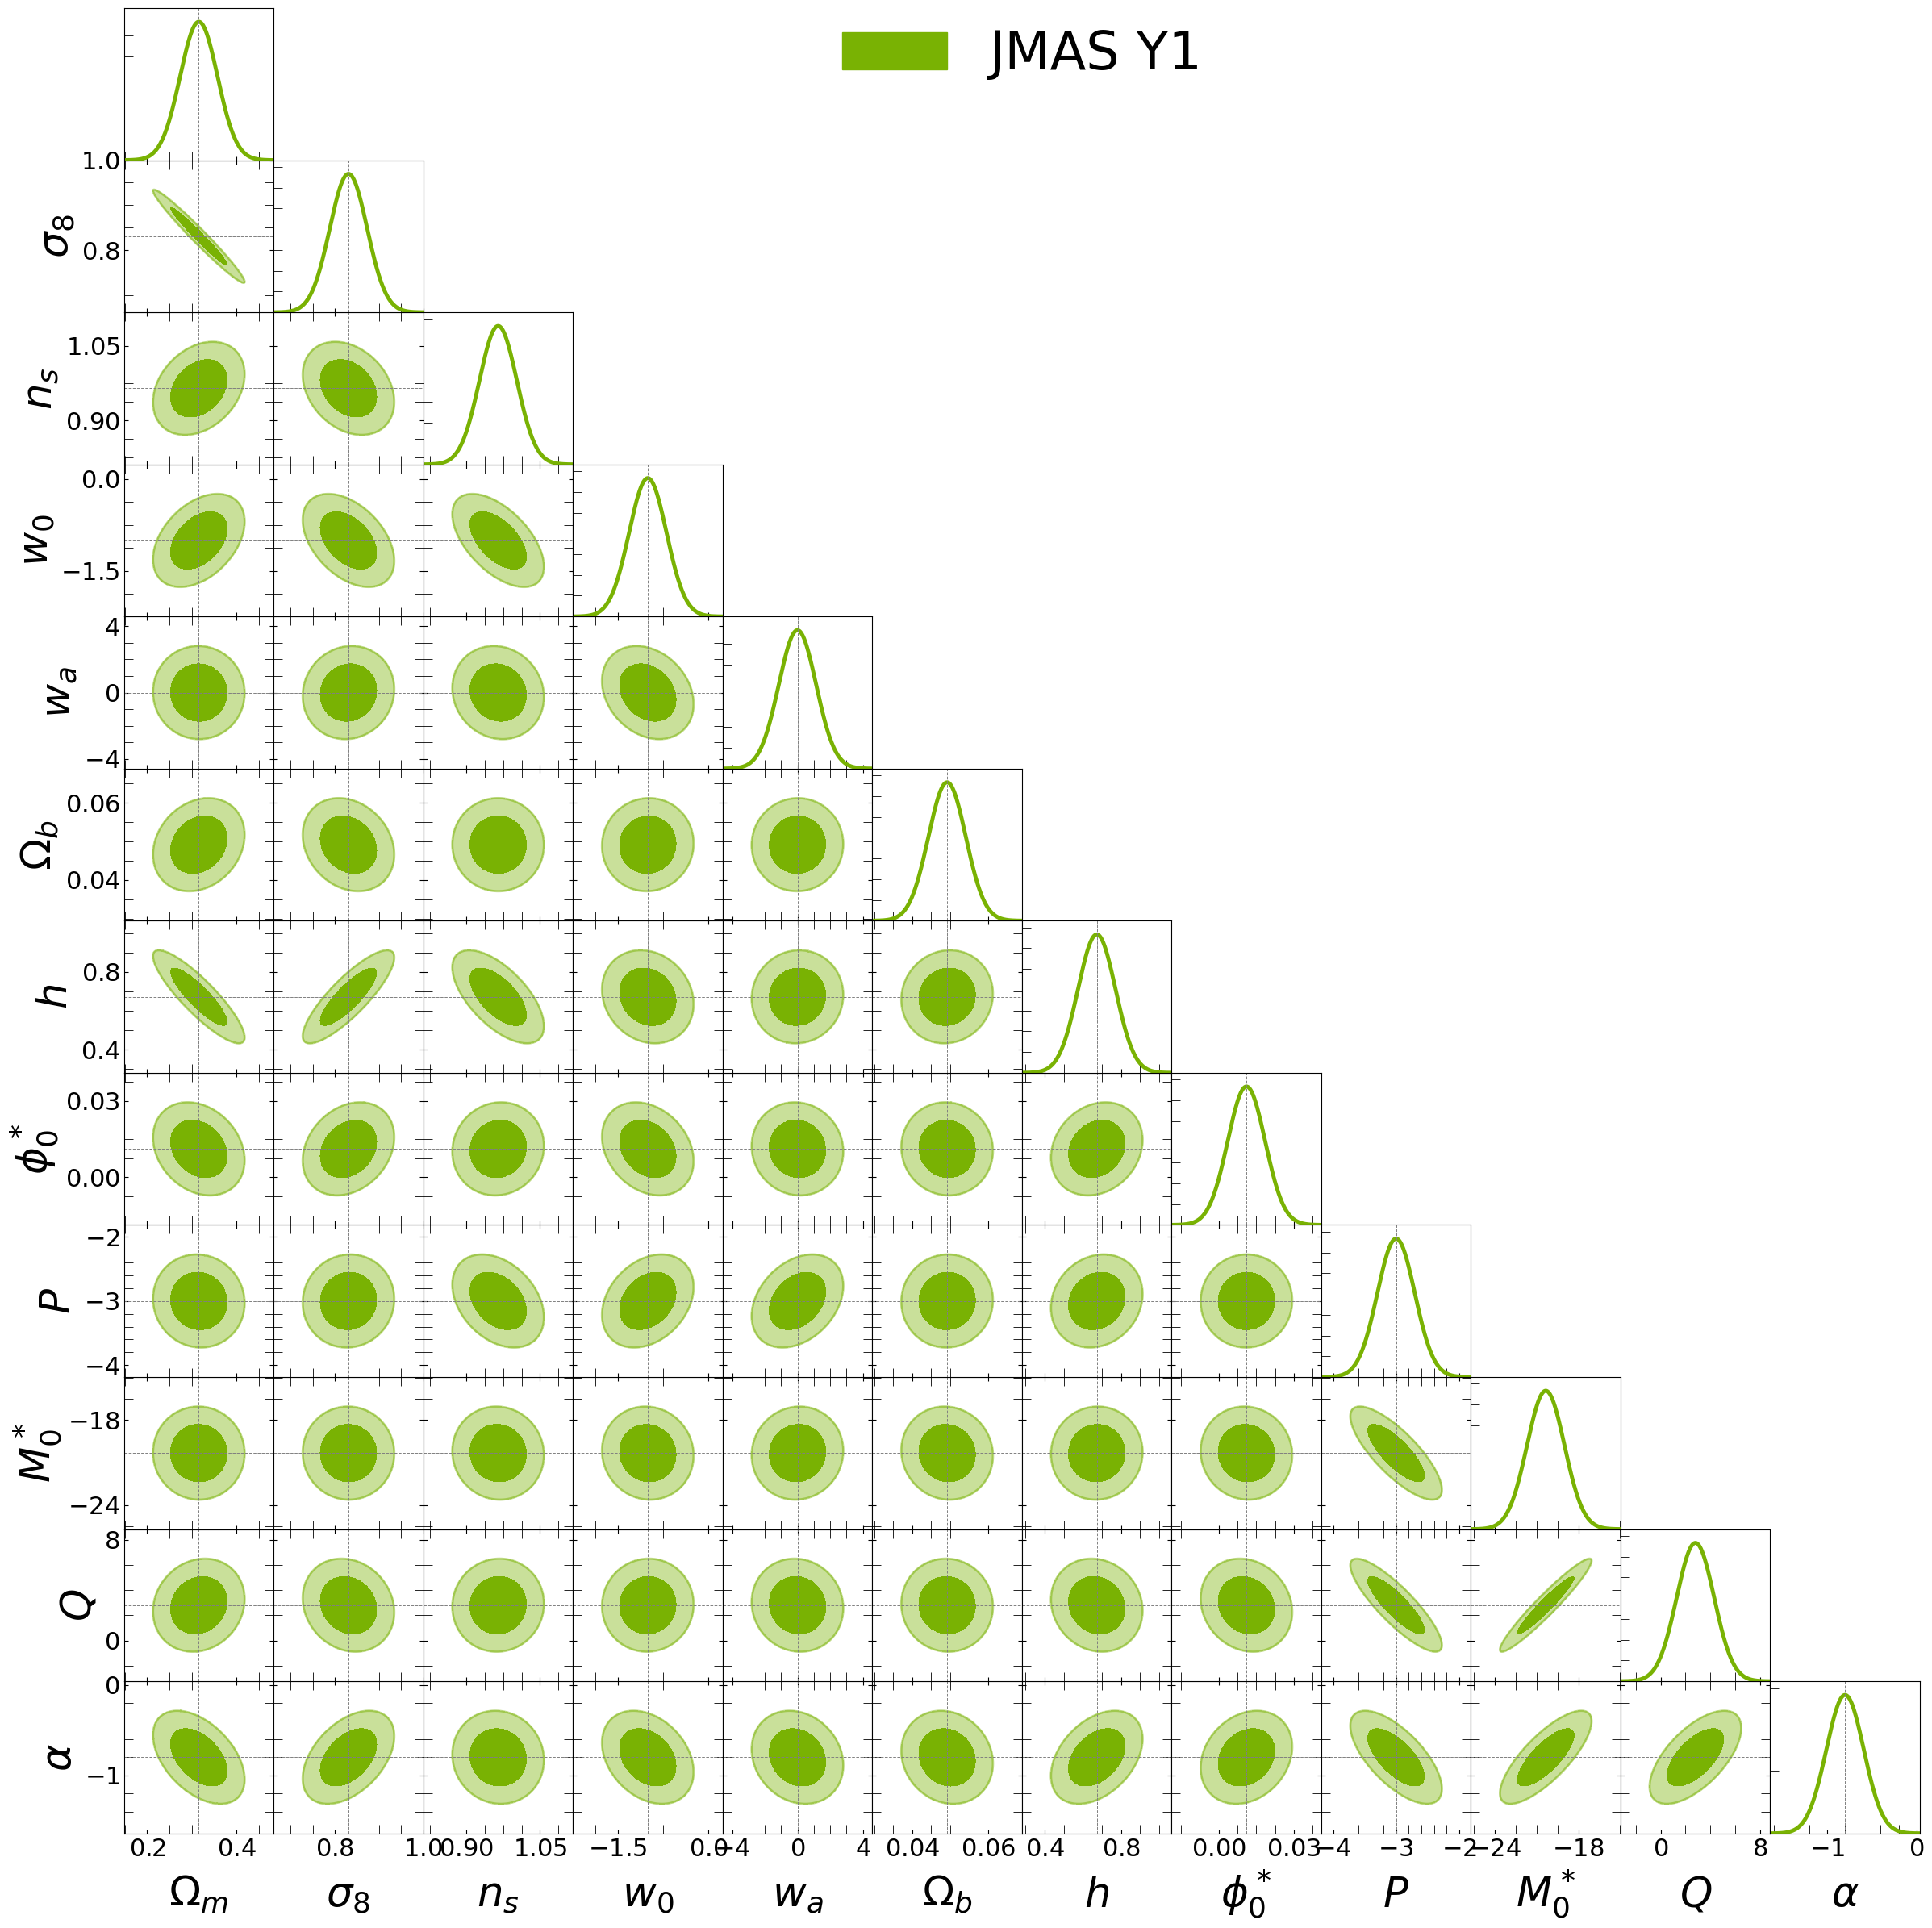

In [20]:
%%time

slice = "cosmolf"
year = "1"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 40
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 25
gdplot.settings.legend_fontsize = 50

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
#plt.gcf().set_size_inches(30, 30)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")


CPU times: user 2min, sys: 12.7 s, total: 2min 13s
Wall time: 59.8 s


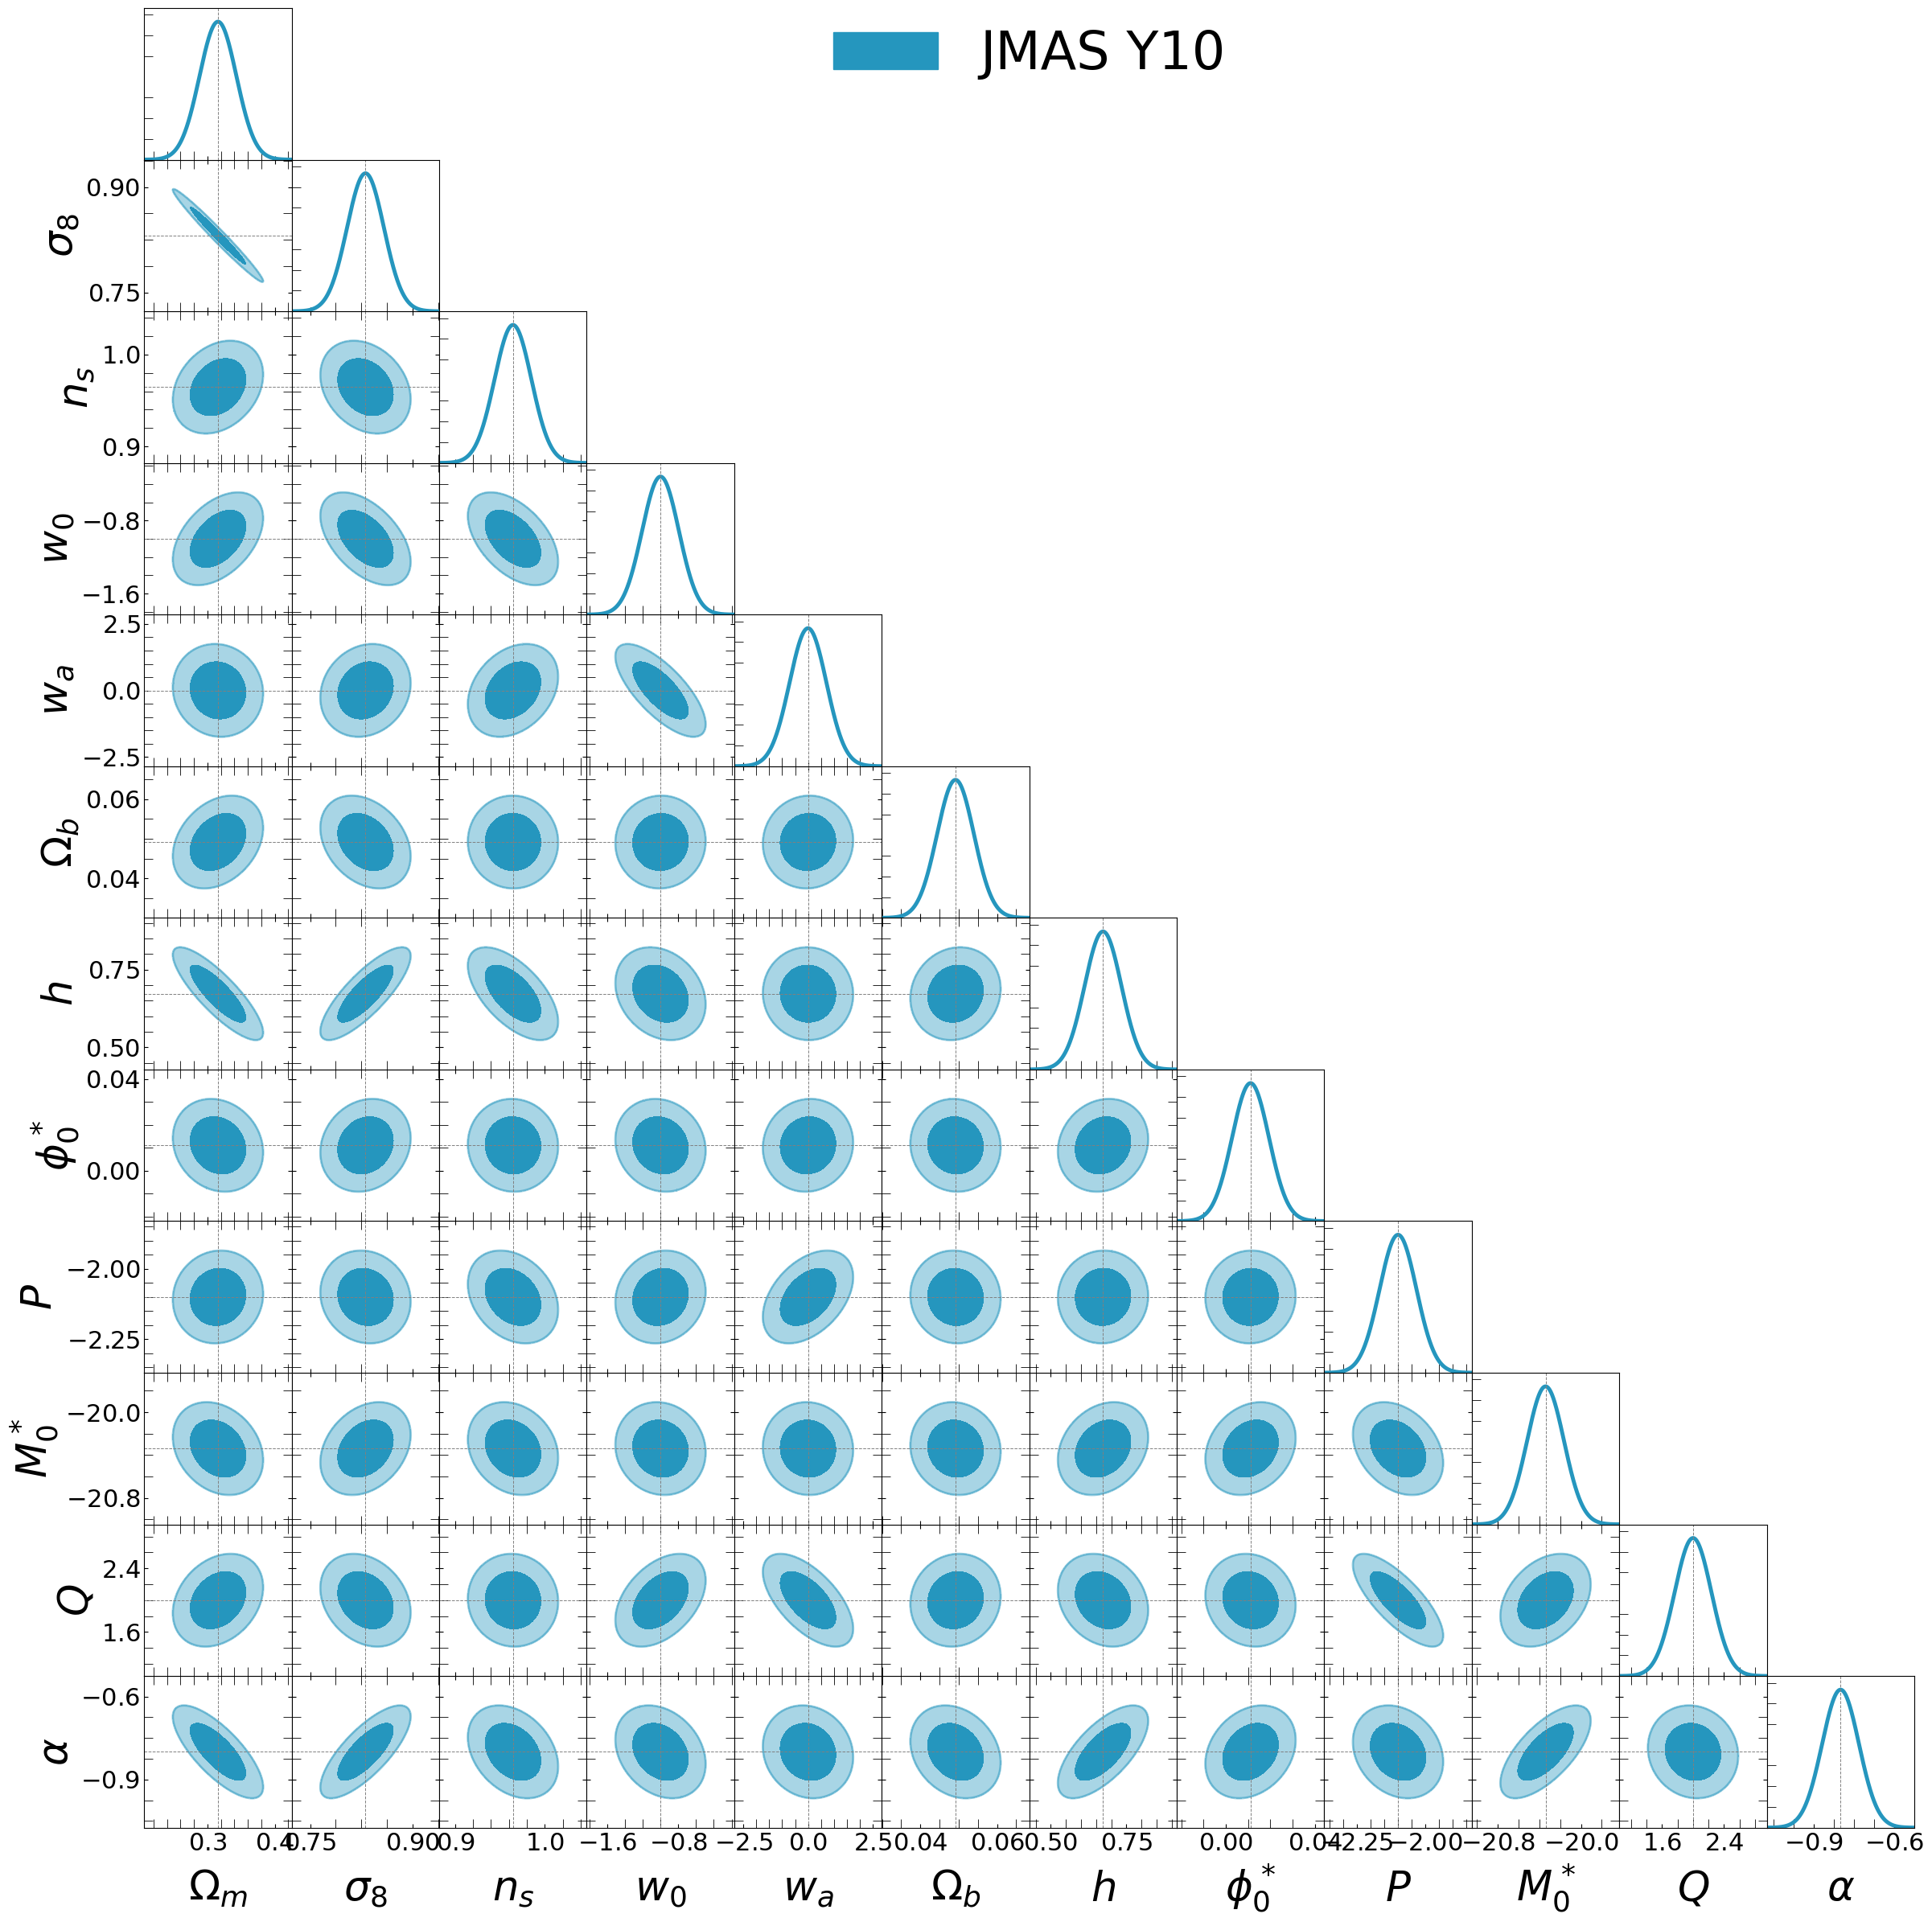

In [21]:
%%time

slice = "cosmolf"
year = "10"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 40
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 25
gdplot.settings.legend_fontsize = 50

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")


CPU times: user 1min 11s, sys: 5.62 s, total: 1min 17s
Wall time: 26 s


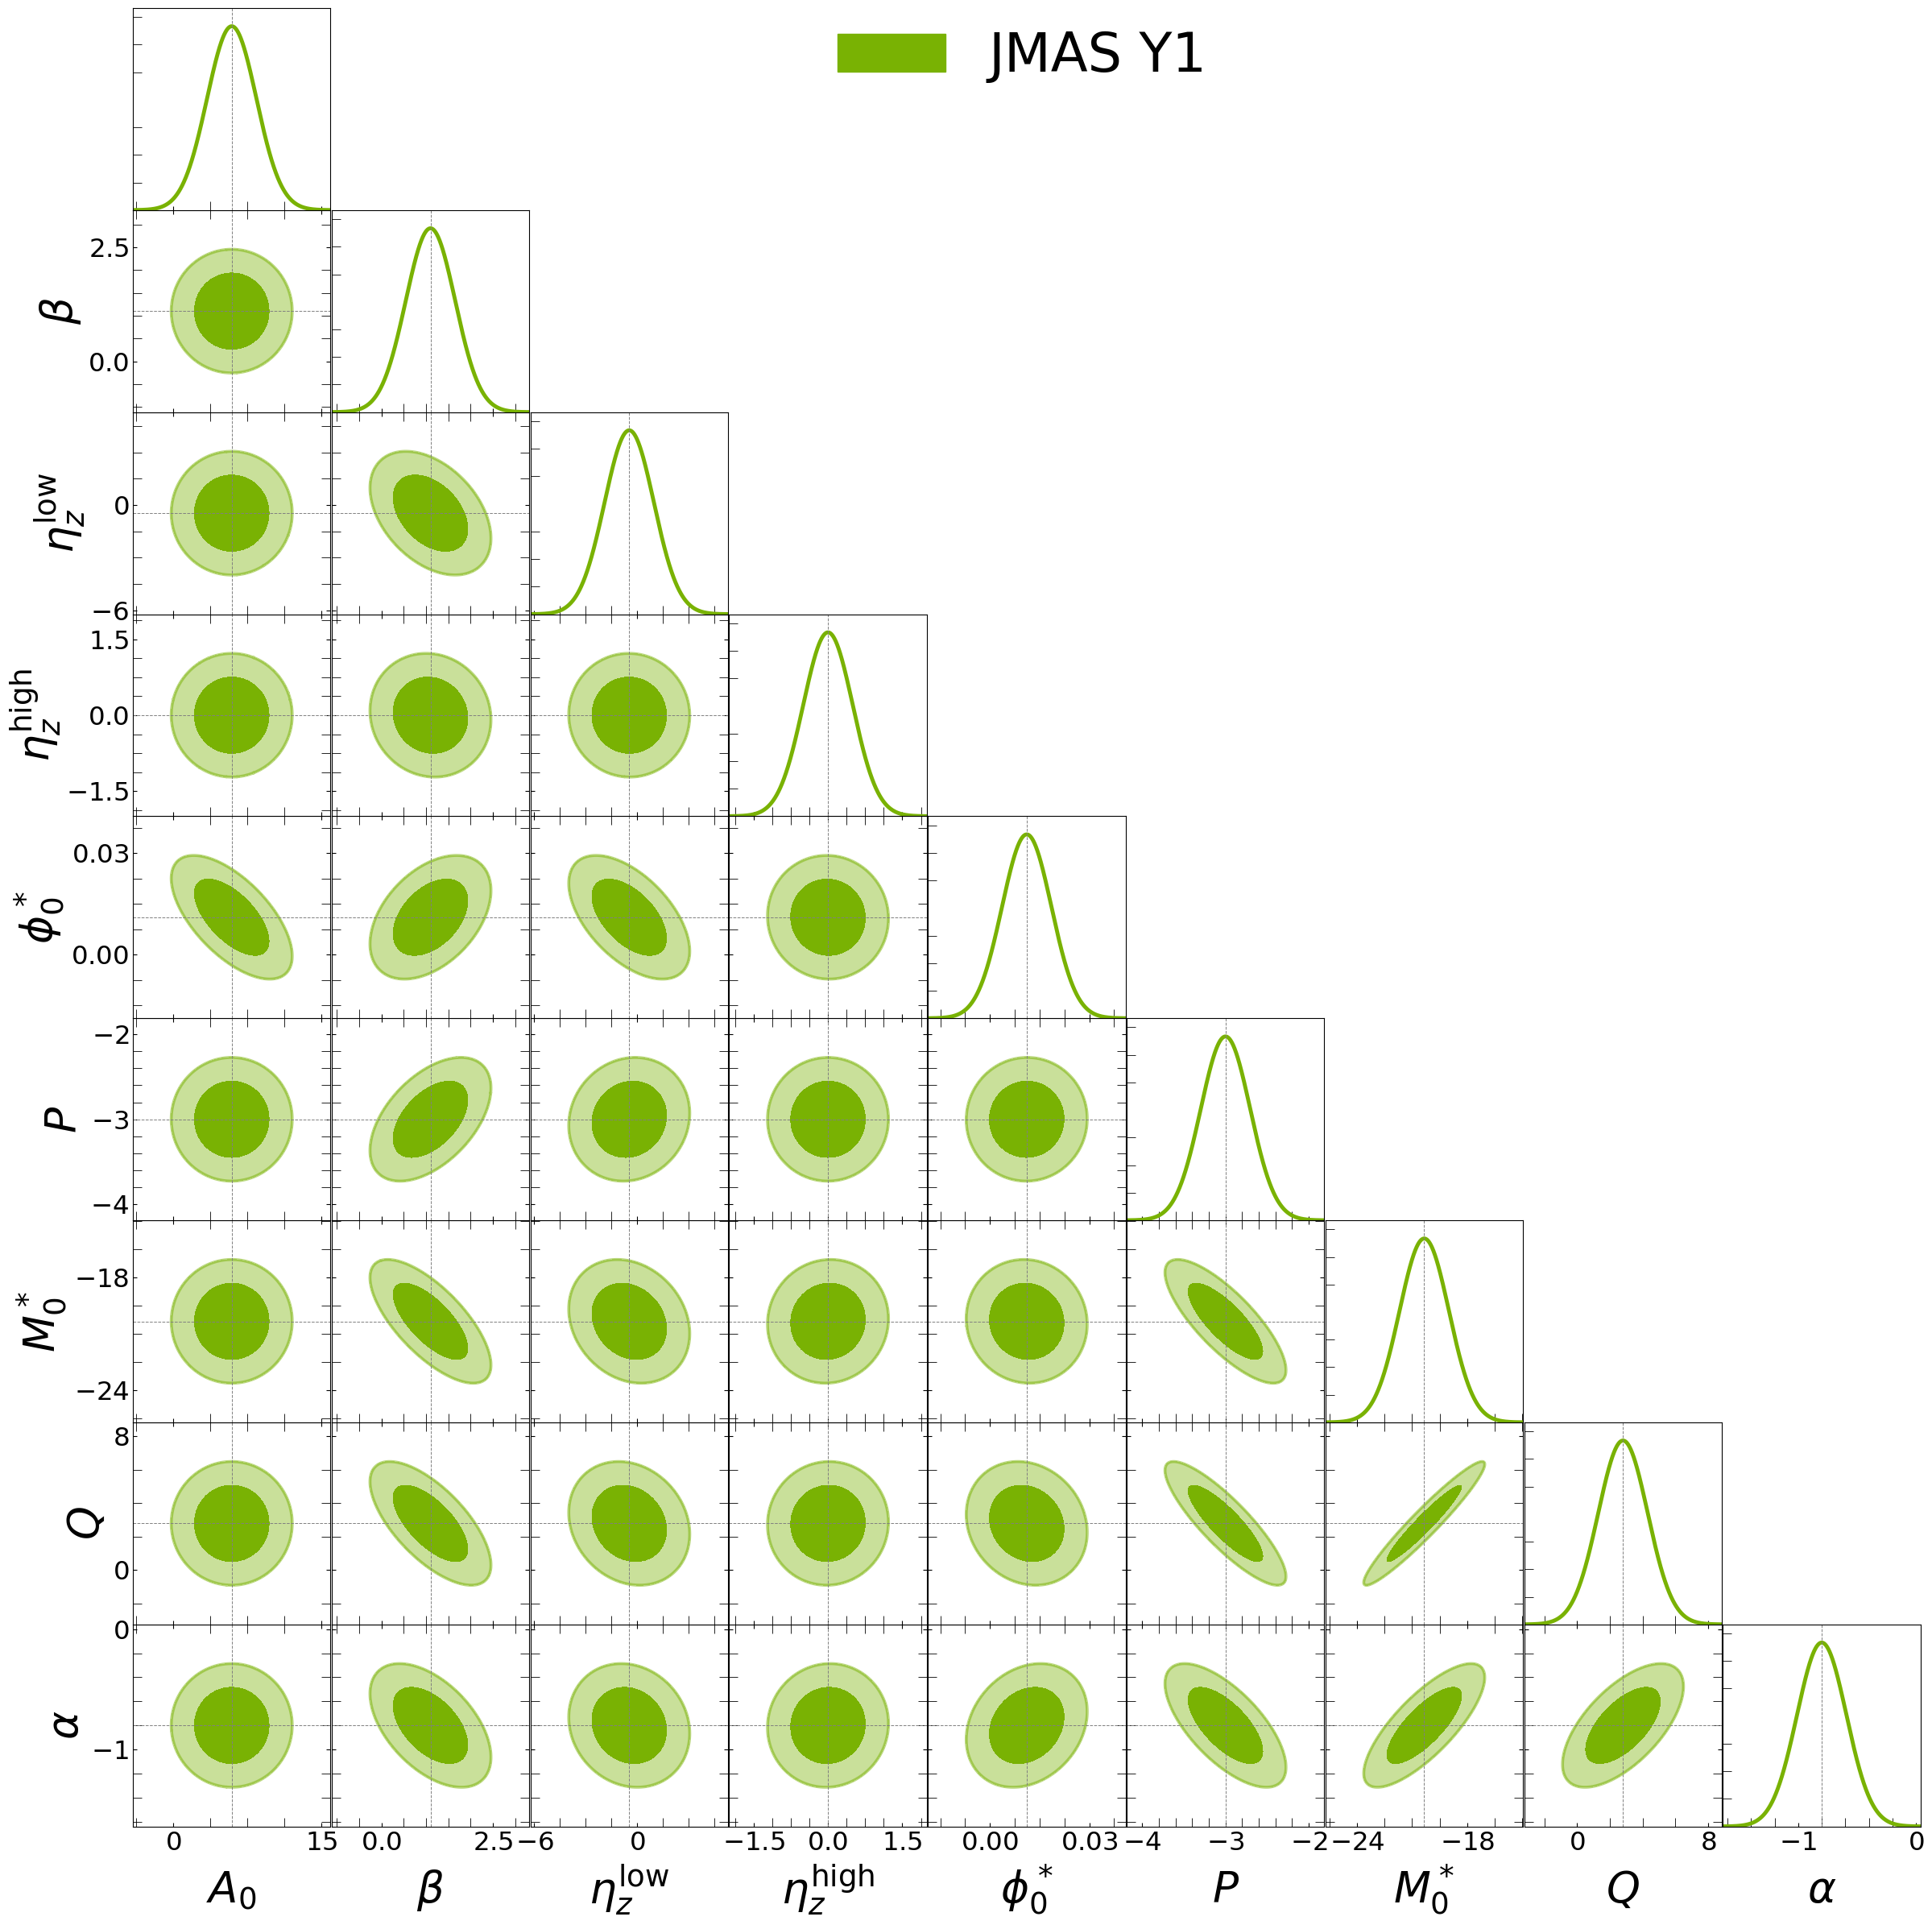

In [22]:
%%time

slice = "ialf"
year = "1"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 40
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 25
gdplot.settings.legend_fontsize = 50

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")


CPU times: user 1min 10s, sys: 6.06 s, total: 1min 16s
Wall time: 27.3 s


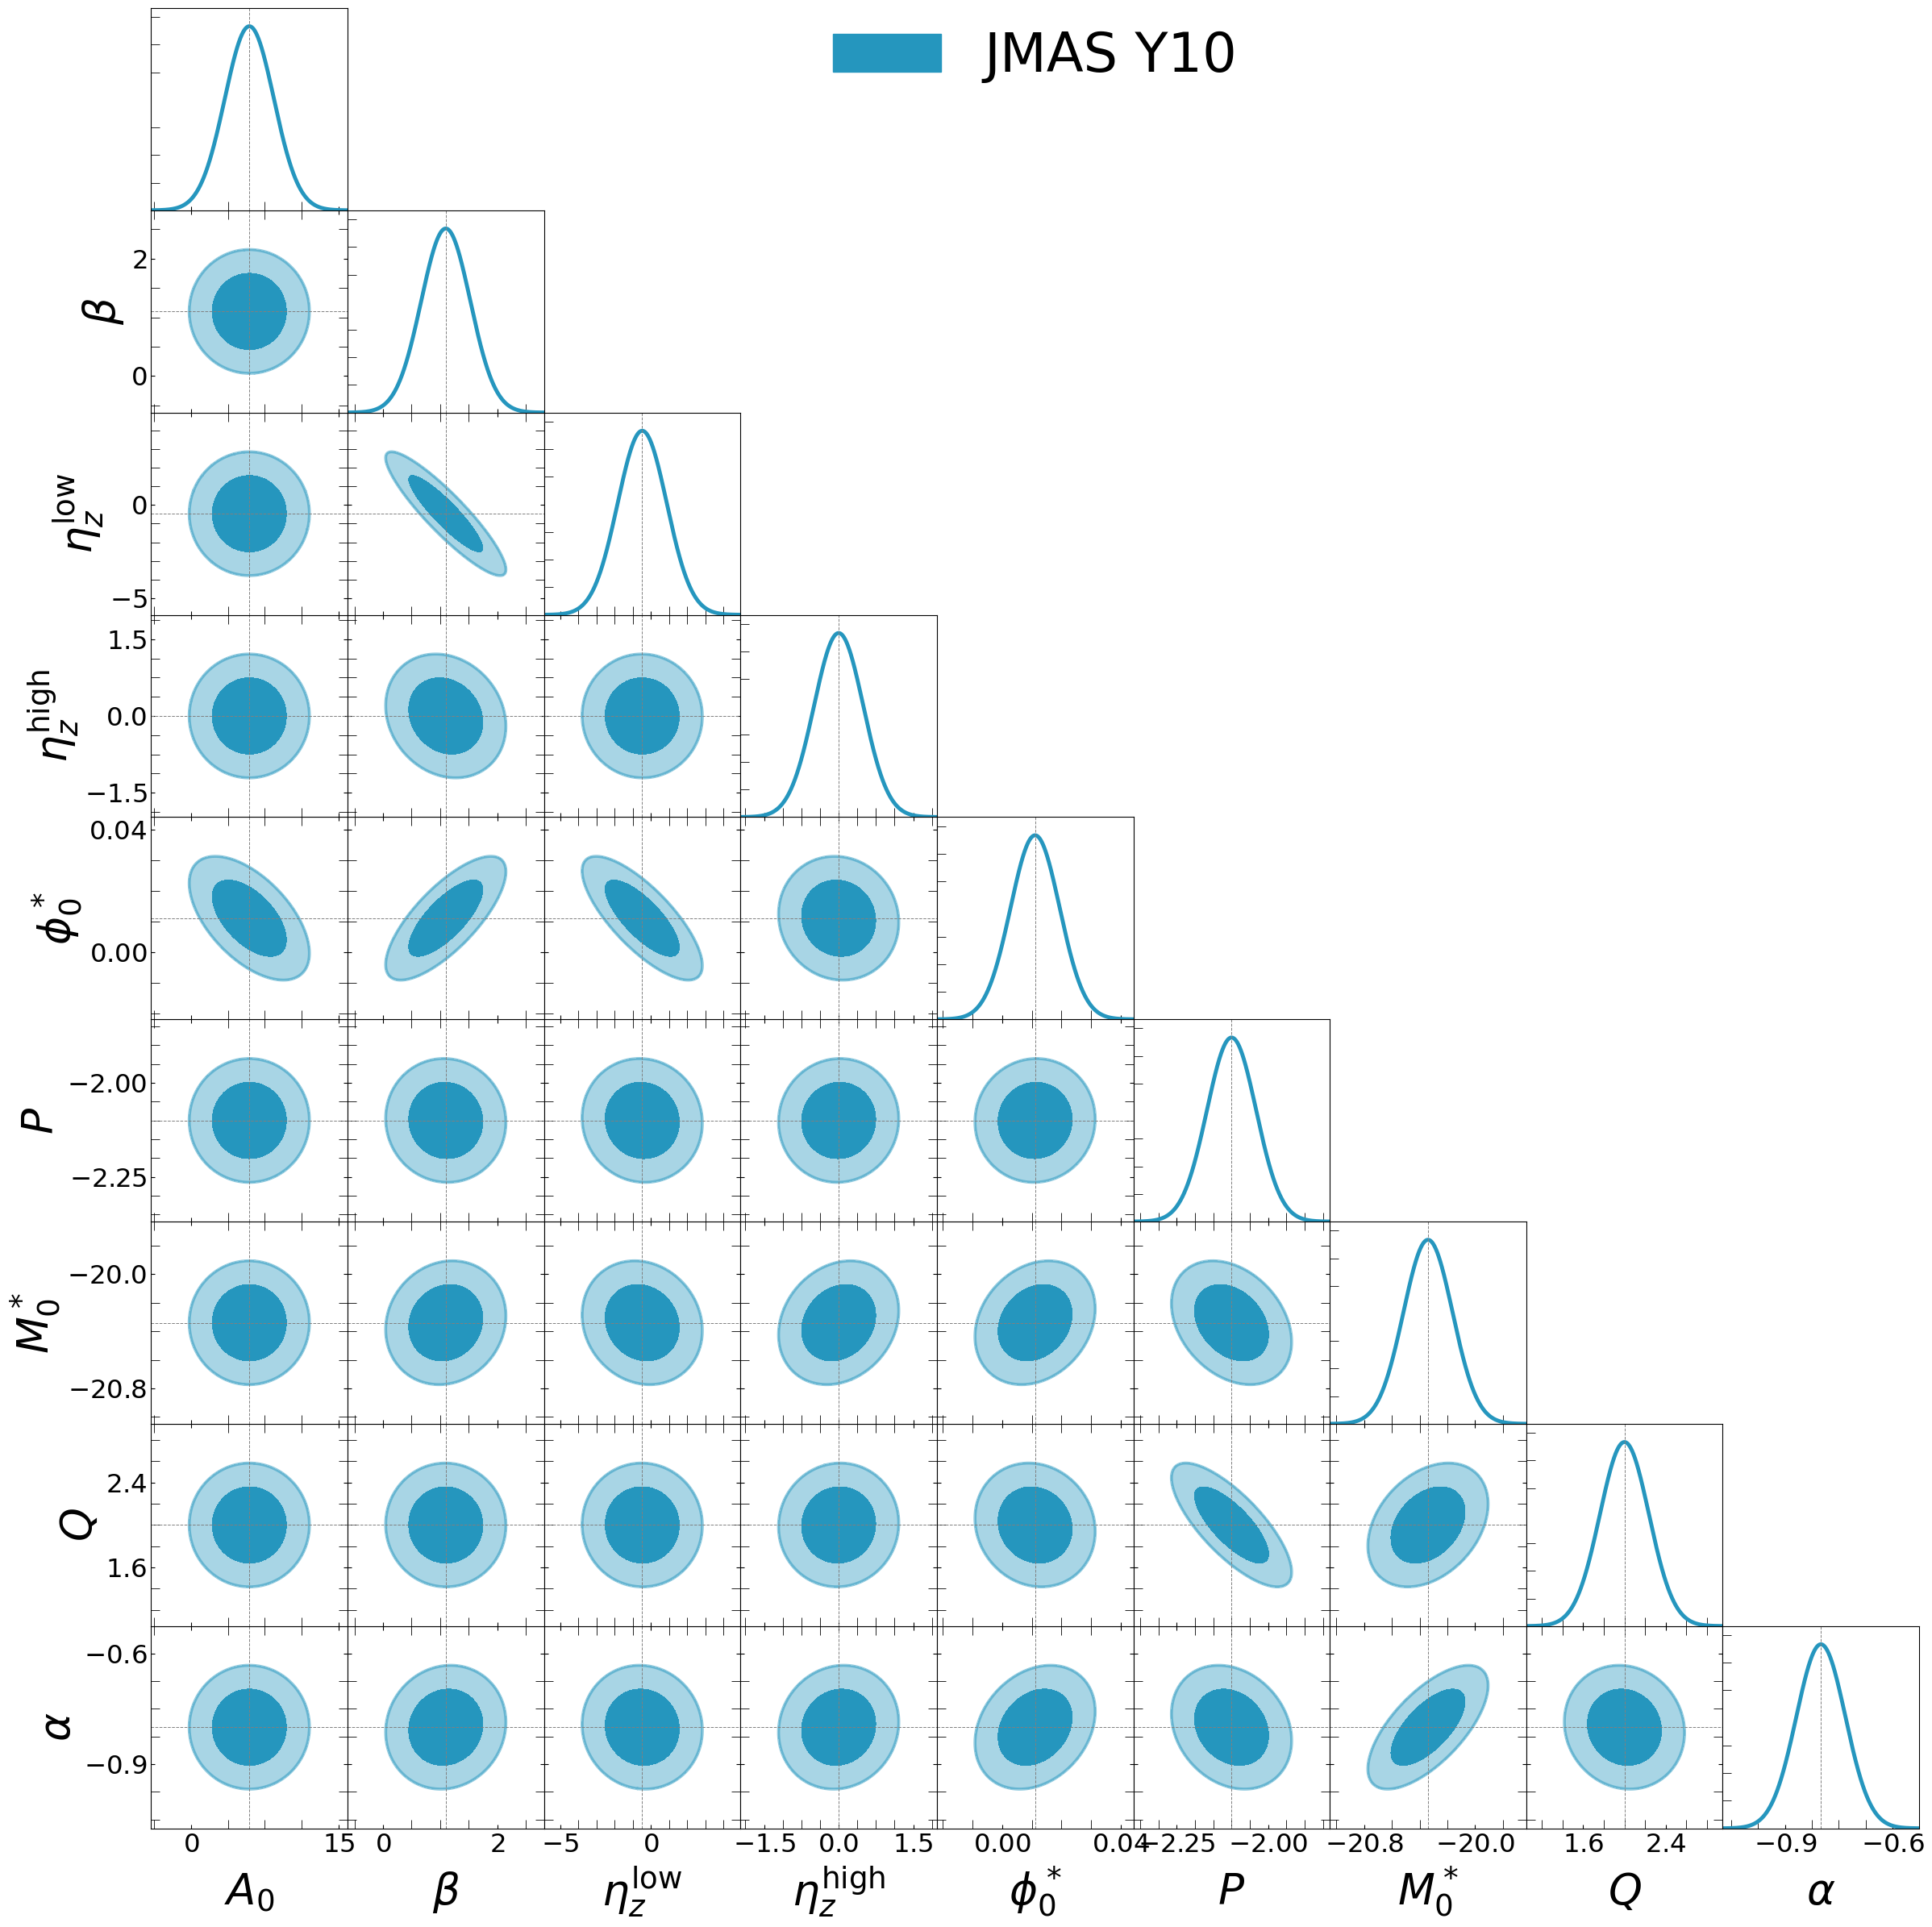

In [23]:
%%time

slice = "ialf"
year = "10"

legend_labels = [f"JMAS Y{year}"]
kwargs = {'contour_colors': [corner_colors["jmas"][year],],
                "filled":[True],
                "contour_ls":["-",],
                "contour_lws":[3.5,],}

gdplot.settings.axes_labelsize = 40
gdplot.settings.legend_rect_border = False
gdplot.settings.axes_fontsize = 25
gdplot.settings.legend_fontsize = 50

gdplot.triangle_plot([gaussians[slice][year]],
                legend_labels=legend_labels,
                legend_ncol=4,
                markers=parameters["values"]["jmas"][slice][year],
                **kwargs)
h.customize_ticks(gdplot, minor_tick_length=8)

# Save the figure with the title
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.pdf", bbox_inches="tight")
plt.savefig(f"{plots_path}corner_jmas_y{year}_{slice}.png", bbox_inches="tight")
